# Proyek Analisis Data: Bike Sharing.
- **Nama:** Merri Putri Cristina Sani Panggabean
- **Email:** merypanggabean219@gmail.com
- **ID Dicoding:** MC404D5X0047

## Menentukan Pertanyaan Bisnis

- Apakah lebih banyak pengguna berlangganan (registered) dibandingkan pengguna kasual (casual)?
- Bagaimana cuaca (weather) mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [102]:
# mememuat tools yang akan digunakan.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

- Memuat tabel **day.csv** dan **hour.csv**

In [103]:
# memanggil dataset pada setiap tabel menggunakan *read.csv*
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

menampilkan data teratas pada tabel **day_df** dan **hour_df**.

In [104]:
#menampilkan data teratas
print("\nmenampilkan datset day_df : \n", day_df.head())
print("\nmenampilkan datset hour_df : \n",hour_df.head())


menampilkan datset day_df : 
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  16

**Insight:**
- menggunakan perintah **pd.read_csv** untuk file **day.csv** untuk membaca file.
- **df.head()** menampilkan tabel teratas pada dataset **day_df**.
- begitu juga pada file **hour.csv**, menggunakan **pd.read.csv** untuk membaca file **hour.csv**.
- menggunakan perintah **df.head()** untuk menampilkan tabel teratas pada dataset **hour_df**.

### Assessing Data

- menilai data **day_df**

In [105]:
# melihat missing value/type data pada setiap kolom dalam data day_df dan hour_df.
print ("\n Menampilkan Missing value pada day_df: \n",day_df.info())
print ("\n Menampilkan Missing value pada hour_df: \n",hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 Menampilkan Missing value pada day_df: 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [106]:
# melihat inaccurate value pada dataset pada day_df dan hour_df.
print("menampilkan inaccurate value pada day_df : \n",day_df.isnull().sum())
print("menampilkan inaccurate value pada hour_df : \n",hour_df.isnull().sum())

menampilkan inaccurate value pada day_df : 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
menampilkan inaccurate value pada hour_df : 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [107]:
#melihat duplikat data pada dataset day_df dan hour_df.
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


**insight**
1. tabel **day_df** dan **hour_df**
  - pada coloumn **dteday** memiliki dtype **object**, akan dikonversi dengan dtype **datetime**.
  - menghapus kolom **instant** karena hanya berupa ID yang tidak perlu di analisis dan menghapus **workingday** karena sudah termasuk ke dalam coloumn **weekday**.
  - tidak ada missing value, Inaccurate value dan duplikat data pada setiap dataset.
  - pada coloumn **season, yr, mnth, holiday, weekday,weathersit** memiliki dtype **int**, maka akan dikonversi nilai numerik menjadi kategori.
  - melakukan konversi isi pada dataset kolom yang berupa type **category**, agar mudah dipahami oleh pengguna.

### Cleaning Data

membersihkan dataset pada tabel **day_df**.

In [108]:
#mengubah dtype object menjadi datetime pada coloumn dteday.
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [109]:
#menghapus coloumn instant
day_df.drop(columns=['instant'], inplace=True)

In [110]:
#menghapus tabel workingday
day_df.drop(columns=['workingday'], inplace=True)

In [111]:
# mengubah dtype pada kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit' menjadi kategori.
int_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

# Mengubah tipe data menjadi kategori
day_df[int_columns] = day_df[int_columns].astype('category')

In [112]:
# konversi isi pada kolom season dan weathersit dengan menggunakan mapping.
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

day_df['season'] = day_df['season'].map(season_mapping)

day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)

In [113]:
# mengkonversi kolom yr menjadi kategori pada day_df.

# kolom yr
day_df['yr'] = day_df['yr'].map({0: '2011', 1: '2012'})
# kolom mnth
day_df['mnth'] = day_df['mnth'].map({i: month for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)})
# kolom holiday
day_df['holiday'] = day_df['holiday'].map({0: 'No', 1: 'Yes'})

# kolom weekday
day_df['weekday'] = day_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
                                           3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})



In [114]:
# mengubah coloum **temp, atemp, hum,windspeed** kedalam skala data ke satuan yang lebih umum.
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,Jan,No,Sunday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,Jan,No,Monday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Winter,2011,Jan,No,Tuesday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Winter,2011,Jan,No,Wednesday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


membersihkan tabel **hour_df**

In [115]:
# mengubah dtype object menjadi datetime pada coloumn dteday.
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [116]:
# menghapus coloumn instant
hour_df.drop(columns=['instant'], inplace=True)

In [117]:
# menghapus workingday pada tabel hour_df.
hour_df.drop(columns=['workingday'], inplace=True)

In [118]:
# mengubah dtype pada kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit' menjadi kategori.
int_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

# Mengubah tipe data menjadi kategori
hour_df[int_columns] = hour_df[int_columns].astype('category')

In [119]:
# konversi isi pada kolom season dan weathersit dengan menggunakan mapping.
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_mapping)

In [120]:
# mengkonversi kolom yr menjadi kategori pada hour_df.

# kolom yr
hour_df['yr'] = hour_df['yr'].map({0: '2011', 1: '2012'})
# kolom mnth
hour_df['mnth'] = hour_df['mnth'].map({i: month for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)})
# kolom holiday
hour_df['holiday'] = hour_df['holiday'].map({0: 'No', 1: 'Yes'})

# kolom weekday
hour_df['weekday'] = hour_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
                                           3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [121]:
# mengubah isi data numerik menjadi str pada kolom hr
hour_df['hr'] = pd.cut(
    hour_df['hr'],
    bins=[0, 4, 8, 12, 16, 20, 24],
    labels=['Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'],
    right=False
).astype(str)  # Mengubah tipe data ke string agar mudah digunakan


In [122]:
# mengubah kolom temp,atemp,hum dan windspeed pada dataset hour sesuai data pada readme.
hour_df["temp"] = hour_df["temp"] * 41
hour_df["atemp"] = hour_df["atemp"] * 50
hour_df["hum"] = hour_df["hum"] * 100
hour_df["windspeed"] = hour_df["windspeed"] * 67

In [123]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,Early Morning,No,Saturday,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- kolom instant dan workingday telah dihapus.
- telah mengisi dataset yang mudah dipahami.
- mengganti typedata int pada season,yr,mnth,holiday,weekday dan weathersit - - - menjadi typedate category.
- mengubah typedate pada dteday menjadi datetime.
- konversi isi kolom hr menjadi string.
- mengubah kolom temp,atemp,hum dan windspeed sesuai parameter dalam readme.

## Exploratory Data Analysis (EDA)

### Explore tabel_df dan hour_df

Explore Tabel **day_df**

In [124]:
# melihat sample pada dataset pada day_df.
day_df.sample(5)

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
394,2012-01-30,Winter,2012,Jan,No,Monday,Clear,11.035847,13.13125,40.0833,14.458064,126,3498,3624
640,2012-10-02,Fall,2012,Oct,No,Tuesday,Light Rain,24.224153,27.11665,87.1667,6.999825,315,4324,4639
263,2011-09-21,Summer,2011,Sep,No,Wednesday,Mist,24.395000,27.52665,90.0000,6.459081,539,3813,4352
457,2012-04-02,Spring,2012,Apr,No,Monday,Clear,17.790433,21.37565,50.4348,20.913313,1208,4728,5936
146,2011-05-27,Spring,2011,May,No,Friday,Clear,27.948347,31.85040,65.3750,16.125493,871,3808,4679


In [125]:
# melihat median,range dll pada dataset day_df
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,2012,Jan,No,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [126]:
# melihat dataset penyewaan sepeda berdasarkan musim pada day_df.
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-126-9d37d11b087d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
season,
Summer,188
Spring,182
Winter,179
Fall,176


In [127]:
#melihat penyewaan sepeda berdasarkan hari pada day_df.
day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-127-79d913295e20>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
mnth,
Jan,62
May,62
Jul,62
Aug,62
Oct,62
Dec,62
Mar,60
Apr,60
Jun,60


explore tabel **hour_df**

In [128]:
# menampilkan sample teratas pada dataset hour_df.
hour_df.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3269,2011-05-21,Spring,2011,May,Midnight,No,Saturday,Clear,19.68,23.485,82.0,7.0015,7,12,19
15161,2012-09-28,Fall,2012,Sep,Night,No,Friday,Mist,23.78,27.275,53.0,15.0013,30,190,220
5222,2011-08-10,Summer,2011,Aug,Afternoon,No,Wednesday,Clear,33.62,36.365,38.0,19.9995,74,166,240
9385,2012-01-31,Winter,2012,Jan,Night,No,Tuesday,Clear,18.04,21.970,38.0,16.9979,2,61,63
3946,2011-06-18,Spring,2011,Jun,Morning,No,Saturday,Clear,27.06,30.305,78.0,6.0032,28,103,131


In [129]:
# melihat range,median dll pada dataset pada hour_df.
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,6,2,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,2012,May,Evening,No,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,2916,16879,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: >

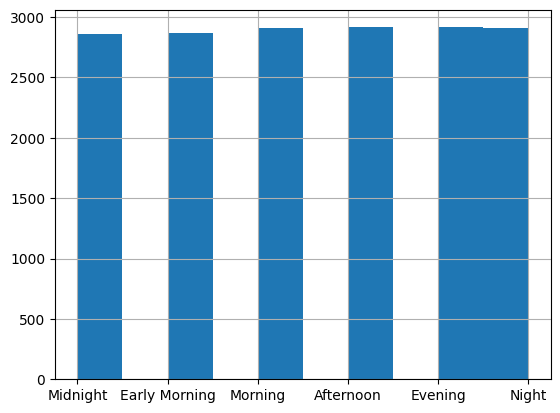

In [130]:
# menampilkan history penyewaan sepeda berdasarkan jam pada hour_df.
hour_df.hr.hist()

In [131]:
#melihat penyewaan sepeda berdasarkan tahun pada hour_df.
hour_df.groupby("yr")["cnt"].mean()

<ipython-input-131-7e448d58aa9d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("yr")["cnt"].mean()


,cnt
yr,
2011,143.794448
2012,234.666361


In [132]:
# melihat penyewaan sepeda berdasarkan hari pada hour_df.
hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-132-e349c6aa30c3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
weekday,
Wednesday,616
Saturday,609
Thursday,606
Tuesday,598
Monday,595
Friday,584
Sunday,571


# menggabungkan semua data

menggabungkan semua dataset.

In [133]:
# menggabungkan data, agar mudah di analisis pada EDA .
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    on="dteday"  # Menggabungkan berdasarkan tanggal
)
all_df.head()

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,weathersit_x,temp_x,atemp_x,hum_x,...,holiday_y,weekday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- melihat 5 sample teratas pada setiap dataset.
- melihat semua data pada setiap dataset menggunakan **describe(include="all")**.
- jika melihat penyewaan sepeda berdasarkan musim. maka penyewaan tertinggi terjadi di musim gugur (Fall) dan terendah di musim dingin (Winter).
- berdasarkan hari, penyewaan sepeda tertinggi terjadi di hari Wednesday dan terendah di hari sunday.
- berdasarkan tahun, penyewaan sepeda tertinggi terjadi di tahun 2011 daripada di tahun 2012 mengalami penyewaan sepeda terendah.
- pada history, menunjukkan hampir sama penyewaan sepede berdasarkan jam.
- berdasarkan bulan, mengalami peningkatan dari bulan januari dan penurunan di bulan september.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah lebih banyak pengguna berlangganan (registered) dibandingkan pengguna kasual (casual)?

In [134]:
all_df.sample(5)

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,weathersit_x,temp_x,atemp_x,hum_x,...,holiday_y,weekday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
8462,2011-12-24,Winter,2011,Dec,No,Saturday,Clear,12.402500,14.96210,54.2500,...,No,Saturday,Mist,12.30,15.150,75.0,11.0014,0,10,10
6540,2011-10-05,Fall,2011,Oct,No,Wednesday,Clear,22.071653,26.35690,64.7917,...,No,Wednesday,Clear,18.86,22.725,82.0,11.0014,1,2,3
7124,2011-10-29,Fall,2011,Oct,No,Saturday,Light Rain,10.420847,11.39565,88.2500,...,No,Saturday,Light Rain,10.66,11.365,93.0,26.0027,1,26,27
15283,2012-10-04,Fall,2012,Oct,No,Thursday,Mist,26.957500,30.39875,72.2917,...,No,Thursday,Light Rain,26.24,28.790,89.0,0.0000,11,65,76
6990,2011-10-23,Fall,2011,Oct,No,Sunday,Clear,17.288347,21.11665,74.1250,...,No,Sunday,Clear,18.04,21.970,72.0,6.0032,24,75,99


<ipython-input-136-b4150b93364f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_yearly = all_df.groupby("yr_y")[["casual_y", "registered_y"]].sum().reset_index()


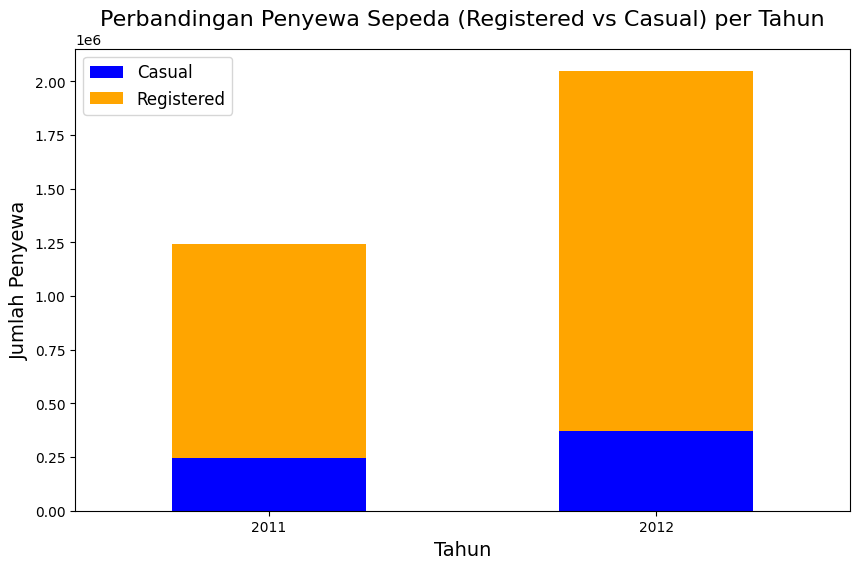

In [136]:

# Mengelompokkan data berdasarkan tahun
df_yearly = all_df.groupby("yr_y")[["casual_y", "registered_y"]].sum().reset_index()

# Membuat bar chart untuk membandingkan jumlah penyewa registered vs casual per tahun
fig, ax = plt.subplots(figsize=(10, 6))
df_yearly.set_index("yr_y").plot(kind="bar", stacked=True, ax=ax, color=["blue", "orange"])
ax.set_xlabel("Tahun", fontsize=14)
ax.set_ylabel("Jumlah Penyewa", fontsize=14)
ax.set_title("Perbandingan Penyewa Sepeda (Registered vs Casual) per Tahun", fontsize=16)
ax.legend(["Casual", "Registered"], fontsize=12)
plt.xticks(rotation=0)
plt.show()

- berdasarkan bulan (**mnth**)

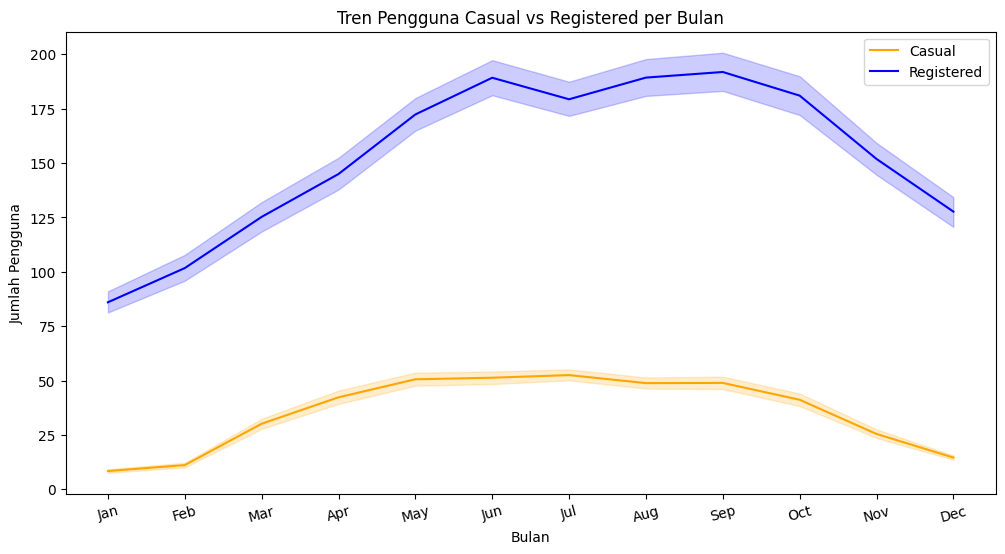

In [137]:
# melihat penyewaan sepeda berdasarkan bulan.
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_df, x="mnth_y", y="casual_y", label="Casual", color="orange")
sns.lineplot(data=all_df, x="mnth_y", y="registered_y", label="Registered", color="blue")
plt.xticks(rotation=15)
plt.title("Tren Pengguna Casual vs Registered per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.legend()
plt.show()


### Pertanyaan 2: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?

<ipython-input-139-555c7362dc39>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


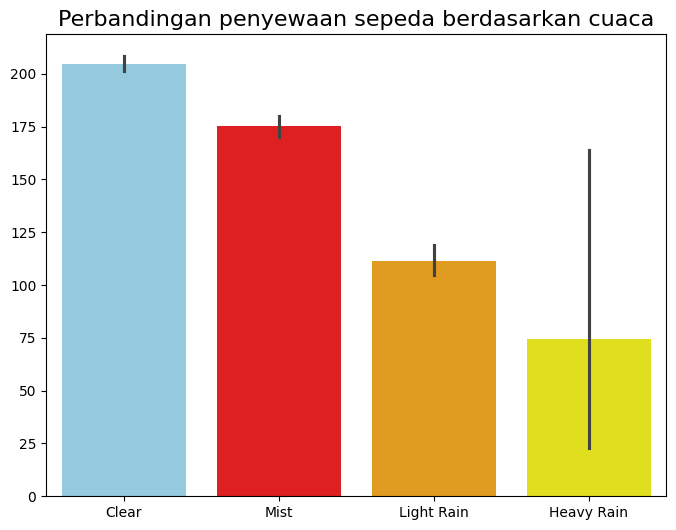

In [139]:
# melihat penyewaan sepeda berdasarkan cuaca.
# mengatur warna
colors = ["skyblue", "red", "orange", "yellow"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(8, 6))

# Buat barplot untuk y="cnt" dan x="weathersit"
sns.barplot(
        y="cnt_y",
        x="weathersit_y",
        data=all_df.sort_values(by="weathersit_y", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Perbandingan penyewaan sepeda berdasarkan cuaca", loc="center", fontsize=16)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# menampilkan plot
plt.show()

**Insight:**
- pengguna registered paling banyak menggunakan penyewaan sepeda dibandingkan pengguna casual setiap bulannya.
- pengguna registered pada tahun 2012 yang paling banyak menggunakan penyewaan sepeda dibanding tahun 2011.
- penyewaan sepeda yang paling banyak berdasarkan cuaca ialah clear dan penyewaan sepeda terendah ialah heavy rain/snow.

## Analisis Lanjutan (Opsional)

# RFM analiysis

In [141]:
# Menentukan tanggal referensi (misal, hari terakhir dalam dataset)
reference_date = all_df["dteday"].max()

# RFM Calculation
rfm_df = all_df.groupby("dteday").agg({
    "dteday": "max",  # Mengambil tanggal terakhir transaksi
    "cnt_y": ["count", "sum"]  # Frequency & Monetary (Total Peminjaman Sepeda)
}).reset_index(drop=True)
rfm_df.columns = ["max_order_timestamp", "frequency", "monetary"]
rfm_df["recency"] = (reference_date - rfm_df["max_order_timestamp"]).dt.days
print(rfm_df.head())

  max_order_timestamp  frequency  monetary  recency
0          2011-01-01         24       985      730
1          2011-01-02         23       801      729
2          2011-01-03         22      1349      728
3          2011-01-04         23      1562      727
4          2011-01-05         23      1600      726


In [142]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,max_order_timestamp,frequency,monetary,recency
730,2012-12-31,24,2729,0
729,2012-12-30,24,1796,1
728,2012-12-29,24,1341,2
727,2012-12-28,24,3095,3
726,2012-12-27,24,2114,4


In [ ]:
# melihat RFM pada dataset mengambil kolom dteday sebagai tanggal transaksi terakhir
# dan juga mengambil kolom season untuk melihat penyewaan sepeda berdasarkan musim pada RFM analisis.
all_df = pd.concat([day_df, hour_df], ignore_index=True)

# melakukan recency
latest_date = all_df["dteday"].max().date()  # Tanggal terakhir dalam dataset
recency_df = all_df.groupby("season_y", observed=True).agg({"dteday": "max"}).reset_index()
recency_df["max_order_timestamp"] = recency_df["dteday"].dt.date
recency_df["recency"] = recency_df["max_order_timestamp"].apply(lambda x: (latest_date - x).days)
recency_df.drop(columns=["dteday"], inplace=True)
# melakukan frequency
frequency_df = all_df.groupby("season_y", observed=True).agg({"dteday": "count"}).reset_index()
frequency_df.rename(columns={"dteday": "frequency"}, inplace=True)
# melakukan monetary.
monetary_df = all_df.groupby("season_y", observed=True).agg({"cnt": "sum"}).reset_index()
monetary_df.rename(columns={"cnt": "monetary"}, inplace=True)

rfm_df = recency_df.merge(frequency_df, on="season_y").merge(monetary_df, on="season")
print(rfm_df.head())

   season max_order_timestamp  recency  frequency  monetary
0    Fall          2012-09-22      100       4684   2122258
1  Spring          2012-12-31        0       4423    942696
2  Summer          2012-06-20      194       4593   1837178
3  Winter          2012-12-20       11       4410   1683226


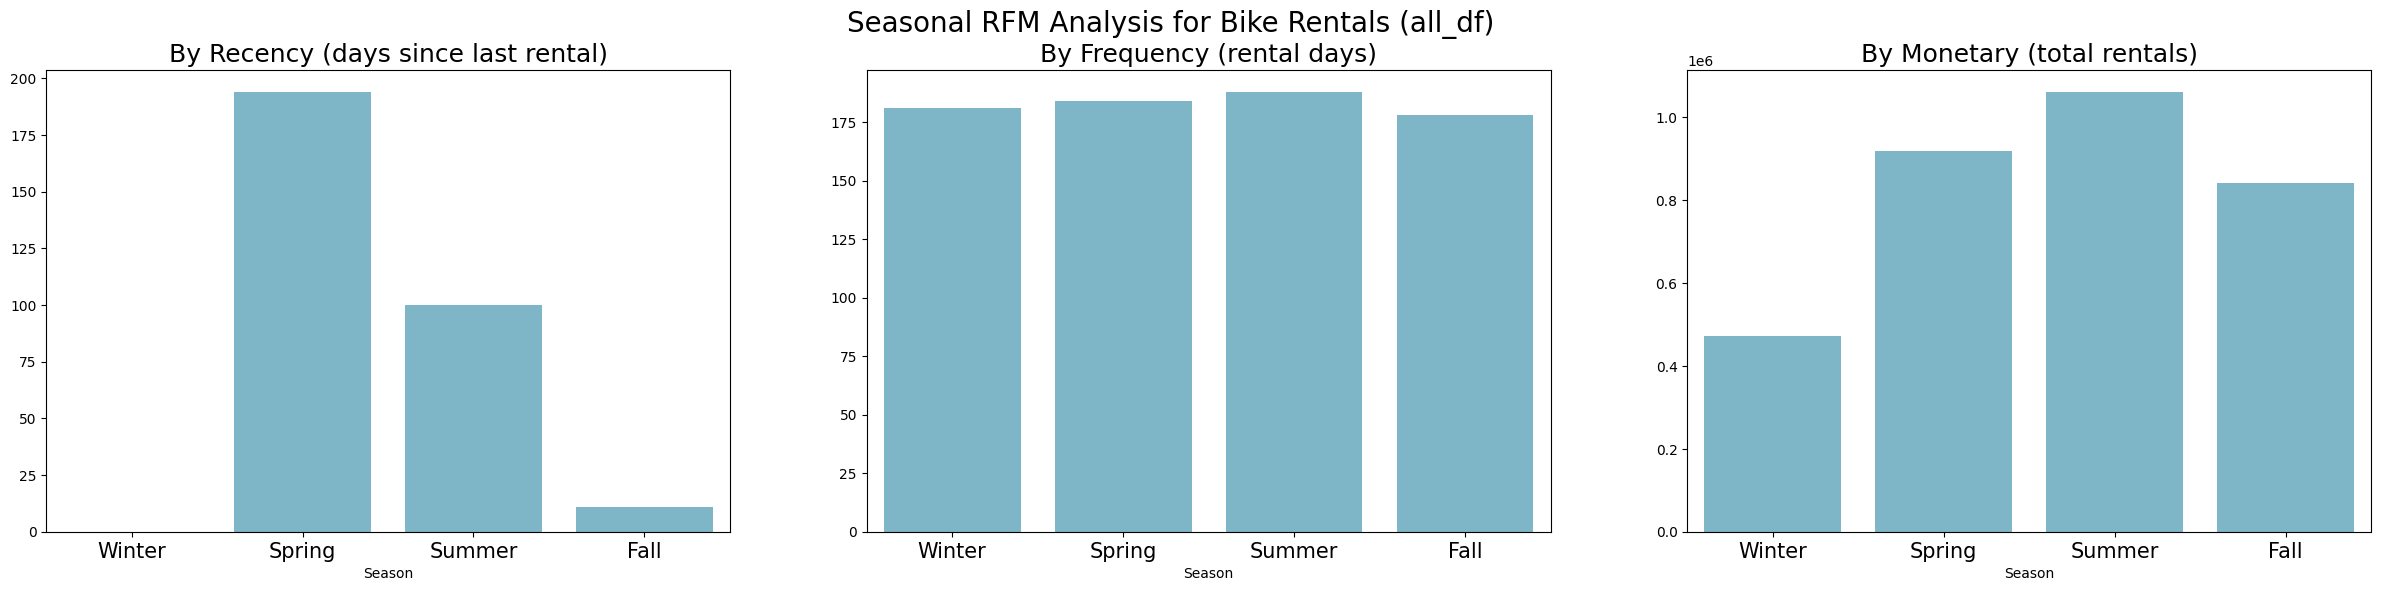

In [145]:
# melihat bloxpot penyewaan sepeda dengan tanggal terakhir berdasarkan musim.

### RECENCY: Tanggal terakhir penyewaan per musim
recency = all_df.groupby("season_y", observed=False)["dteday"].max().reset_index()
recency["recency_days"] = (recency["dteday"].max() - recency["dteday"]).dt.days  # Hitung hari sejak terakhir sewa
recency = recency.drop(columns=["dteday"])

### FREQUENCY: Jumlah hari unik penyewaan per musim
frequency = all_df.groupby("season_y", observed=False)["dteday"].nunique().reset_index()
frequency.columns = ["season_y", "rental_days"]

### MONETARY: Total penyewaan sepeda per musim
monetary = all_df.groupby("season_y", observed=False)["cnt_y"].sum().reset_index()
monetary.columns = ["season_y", "total_rentals"]

# Gabungkan hasil RFM
rfm_df = recency.merge(frequency, on="season_y").merge(monetary, on="season_y")

# Buat visualisasi menggunakan matplotlib dan seaborn
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Recency Plot
sns.barplot(y="recency_days", x="season_y", hue="season_y", data=rfm_df.sort_values(by="recency_days", ascending=True), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Season")
ax[0].set_title("By Recency (days since last rental)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Frequency Plot
sns.barplot(y="rental_days", x="season_y", hue="season_y", data=rfm_df.sort_values(by="rental_days", ascending=False), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Season")
ax[1].set_title("By Frequency (rental days)", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary Plot
sns.barplot(y="total_rentals", x="season_y", hue="season_y", data=rfm_df.sort_values(by="total_rentals", ascending=False), palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel("Season")
ax[2].set_title("By Monetary (total rentals)", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Seasonal RFM Analysis for Bike Rentals (all_df)", fontsize=20)
plt.show()

## Clustering Analisis

disini saya menggunakan clustering analisis untuk analisis dataset day_df dan hour_df.

**total penyewa sepeda berdasarkan musim**.

In [148]:
# Contoh: Mengelompokkan total penyewaan sepeda berdasarkan musim
sorted_season_usage = all_df.groupby("season_y")["cnt_y"].sum().reset_index()

# Mengurutkan berdasarkan jumlah penyewaan sepeda
sorted_season_usage = sorted_season_usage.sort_values(by="cnt_y", ascending=False)

# Mapping season agar lebih mudah dibaca
sorted_season_usage["season_y"] = sorted_season_usage["season_y"].replace(season_mapping)

# Menampilkan hasil
print(sorted_season_usage)

  season_y    cnt_y
2   Summer  1061129
1   Spring   918589
3     Fall   841613
0   Winter   471348


<ipython-input-148-6a61be22b9cd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_season_usage = all_df.groupby("season_y")["cnt_y"].sum().reset_index()


**total penyewa sepeda berdasarkan tahun**

In [151]:
# menghitung total penyewa sepeda berdasarkan tahun
total_rentals_by_year = all_df.groupby("yr_y")["cnt_y"].sum().reset_index()
print(total_rentals_by_year)


   yr_y    cnt_y
0  2011  1243103
1  2012  2049576


<ipython-input-151-8c3a3dea4e19>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rentals_by_year = all_df.groupby("yr_y")["cnt_y"].sum().reset_index()
